<a href="https://colab.research.google.com/github/guupiii/ESAA/blob/main/YB_1010_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**오차 행렬(혼동 행렬) 생성**

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[337  20]
 [ 30 182]]


**정확도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [12]:
# 정확도는 전체 표본 중 맞춘 비율을 의미하고 전반적인 성능을 알 수 있다.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy_score(y, y_pred)

0.9121265377855887

**정밀도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [9]:
# 정밀도는 모델이 True라고 판정한 것 중 실제 True의 비율을 말한다. 신뢰도를 알 수 있다.
precision_score(y, y_pred, pos_label=1, zero_division=0)

0.900990099009901

**재현율의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [10]:
# 재현율은 실제 True 중에서 모델이 True로 판정한 비율을 말하고 True를 놓지지 않는 것이 중요할 때 주요 평가지표로 쓰인다.
recall_score(y, y_pred, pos_label=1, zero_division=0)

0.8584905660377359

**F1 score의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [11]:
# 정밀도와 재현율의 조화평균이다. 정밀도와 재현율이 균형을 잘 이루는 지 알 수 있다.
f1_score(y, y_pred, pos_label=1, zero_division=0)

0.8792270531400966

**예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.**

In [15]:
from sklearn.preprocessing import Binarizer
y_proba = model_lor.predict_proba(X)[:, 1]      # 악성(1) 확률
y_pred2 = Binarizer(threshold=0.1).fit_transform(y_proba.reshape(-1,1)).ravel()

In [17]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
cm2 = confusion_matrix(y, y_pred2, labels=[0, 1])
tn2, fp2, fn2, tp2 = cm2.ravel()
print(cm2)

acc2  = accuracy_score(y, y_pred2)
prec2 = precision_score(y, y_pred2, pos_label=1, zero_division=0)
rec2  = recall_score(y, y_pred2, pos_label=1, zero_division=0)
f12   = f1_score(y, y_pred2, pos_label=1, zero_division=0)

print(f"Accuracy : {acc2:.4f}")
print(f"Precision: {prec2:.4f}")
print(f"Recall   : {rec2:.4f}")
print(f"F1-score : {f12:.4f}")

[[267  90]
 [  6 206]]
Accuracy : 0.8313
Precision: 0.6959
Recall   : 0.9717
F1-score : 0.8110


**ROC 곡선 시각화**

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = model_lor.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_proba, pos_label=1)


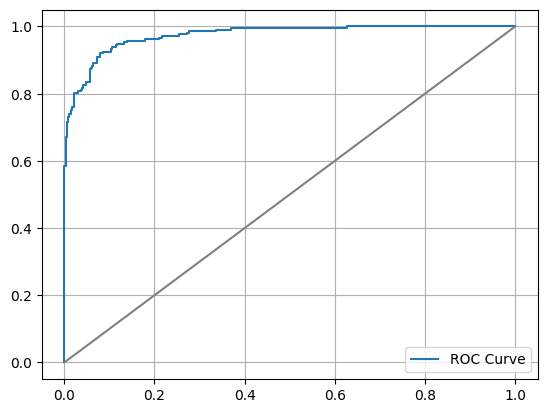

In [20]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], color='gray')
plt.legend()
plt.grid(True)
plt.show()

**ROC AUC 값을 구하고 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [25]:
auc_value = roc_auc_score(y, y_proba)
print(auc_value)
# 약0.97이 나오므로 높은 분류 성능을 가졌다는 것을 알 수 있다.

0.974076423022039
